#CHALLENGE 8: Redes Neuronales Convolucionales (CNN)

**Estudiante: Daniel Ivan Zavaleta Guzmán**

In [1]:
!nvidia-smi

Mon Jun  3 15:56:40 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              1W /   50W |     127MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

##Introducción

En este challenge, al buscar bases de datos libres dentro de Physionet, se encontró la base de datos "Heart and lung segmentations for MIMIC-CXR/MIMIC-CXR-JPG and Montgomery County TB databases", la cual proporciona segmentaciones manuales de corazones y pulmones para imágenes de rayos X de pecho de las bases de datos MIMIC-CXR/MIMIC-CXR-JPG y Montgomery County tuberculosis (TB) [1].

No obstante, aunque esta base de datos de Physionet proporciona segmentaciones del corazón para las 138 radiografías de tórax posteriores-anteriores de la Montgomery County TB database, este challenge no empleará las segmentaciones cardíacas de esta base de datos de Physionet. En cambio, se centrará exclusivamente en las imágenes de rayos X completas del Montgomery County TB database para realizar clasificaciones de ausencia o presencia de tuberculosis en base a radiografías de tórax [2].

La información del Montgomery County TB database se puede encontrar en: https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/index.html .


Referencias:

1. Duvieusart, B., Krones, F., Parsons, G., Tarassenko, L., Papiez, B. W., & Mahdi, A. (2023). Heart and lung segmentations for MIMIC-CXR/MIMIC-CXR-JPG and Montgomery County TB databases (version 1.0.0). PhysioNet. https://doi.org/10.13026/0k35-mb65.

2. Montgomery County X-ray Set, Link:
https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-rayDatasets/Montgomery-County-CXR-Set/MontgomerySet/index.html

##Importación de librerias

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import pandas as pd
import numpy as np

In [4]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

##Obtención de base de datos de physionet

In [5]:
#!wget -r -N -c -np https://physionet.org/files/chexmask-cxr-segmentation-data/0.4/ # todo dataset
#!wget -r -N -c -np https://physionet.org/content/chexmask-cxr-segmentation-data/0.4/OriginalResolution/ChestX-Ray8.csv

#obtencion de imagenes:
#!wget -r -N -c -np https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/index.html

In [ ]:

import wget
import os

# Lista completa de nombres de archivos
file_names = [
    "MCUCXR_0001_0.png", "MCUCXR_0002_0.png", "MCUCXR_0003_0.png",
    "MCUCXR_0004_0.png", "MCUCXR_0005_0.png", "MCUCXR_0006_0.png",
    "MCUCXR_0008_0.png", "MCUCXR_0011_0.png", "MCUCXR_0013_0.png",
    "MCUCXR_0015_0.png", "MCUCXR_0016_0.png", "MCUCXR_0017_0.png",
    "MCUCXR_0019_0.png", "MCUCXR_0020_0.png", "MCUCXR_0021_0.png",
    "MCUCXR_0022_0.png", "MCUCXR_0023_0.png", "MCUCXR_0024_0.png",
    "MCUCXR_0026_0.png", "MCUCXR_0027_0.png", "MCUCXR_0028_0.png",
    "MCUCXR_0029_0.png", "MCUCXR_0030_0.png", "MCUCXR_0031_0.png",
    "MCUCXR_0035_0.png", "MCUCXR_0038_0.png", "MCUCXR_0040_0.png",
    "MCUCXR_0041_0.png", "MCUCXR_0042_0.png", "MCUCXR_0043_0.png",
    "MCUCXR_0044_0.png", "MCUCXR_0045_0.png", "MCUCXR_0046_0.png",
    "MCUCXR_0047_0.png", "MCUCXR_0048_0.png", "MCUCXR_0049_0.png",
    "MCUCXR_0051_0.png", "MCUCXR_0052_0.png", "MCUCXR_0053_0.png",
    "MCUCXR_0054_0.png", "MCUCXR_0055_0.png", "MCUCXR_0056_0.png",
    "MCUCXR_0057_0.png", "MCUCXR_0058_0.png", "MCUCXR_0059_0.png",
    "MCUCXR_0060_0.png", "MCUCXR_0061_0.png", "MCUCXR_0062_0.png",
    "MCUCXR_0063_0.png", "MCUCXR_0064_0.png", "MCUCXR_0068_0.png",
    "MCUCXR_0069_0.png", "MCUCXR_0070_0.png", "MCUCXR_0071_0.png",
    "MCUCXR_0072_0.png", "MCUCXR_0074_0.png", "MCUCXR_0075_0.png",
    "MCUCXR_0077_0.png", "MCUCXR_0079_0.png", "MCUCXR_0080_0.png",
    "MCUCXR_0081_0.png", "MCUCXR_0082_0.png", "MCUCXR_0083_0.png",
    "MCUCXR_0084_0.png", "MCUCXR_0085_0.png", "MCUCXR_0086_0.png",
    "MCUCXR_0087_0.png", "MCUCXR_0089_0.png", "MCUCXR_0090_0.png",
    "MCUCXR_0091_0.png", "MCUCXR_0092_0.png", "MCUCXR_0094_0.png",
    "MCUCXR_0095_0.png", "MCUCXR_0096_0.png", "MCUCXR_0097_0.png",
    "MCUCXR_0099_0.png", "MCUCXR_0100_0.png", "MCUCXR_0101_0.png",
    "MCUCXR_0102_0.png", "MCUCXR_0103_0.png", "MCUCXR_0104_1.png",
    "MCUCXR_0108_1.png", "MCUCXR_0113_1.png", "MCUCXR_0117_1.png",
    "MCUCXR_0126_1.png", "MCUCXR_0140_1.png", "MCUCXR_0141_1.png",
    "MCUCXR_0142_1.png", "MCUCXR_0144_1.png", "MCUCXR_0150_1.png",
    "MCUCXR_0162_1.png", "MCUCXR_0166_1.png", "MCUCXR_0170_1.png",
    "MCUCXR_0173_1.png", "MCUCXR_0182_1.png", "MCUCXR_0188_1.png",
    "MCUCXR_0194_1.png", "MCUCXR_0195_1.png", "MCUCXR_0196_1.png",
    "MCUCXR_0203_1.png", "MCUCXR_0213_1.png", "MCUCXR_0218_1.png",
    "MCUCXR_0223_1.png", "MCUCXR_0228_1.png", "MCUCXR_0243_1.png",
    "MCUCXR_0251_1.png", "MCUCXR_0253_1.png", "MCUCXR_0254_1.png",
    "MCUCXR_0255_1.png", "MCUCXR_0258_1.png", "MCUCXR_0264_1.png",
    "MCUCXR_0266_1.png", "MCUCXR_0275_1.png", "MCUCXR_0282_1.png",
    "MCUCXR_0289_1.png", "MCUCXR_0294_1.png", "MCUCXR_0301_1.png",
    "MCUCXR_0309_1.png", "MCUCXR_0311_1.png", "MCUCXR_0313_1.png",
    "MCUCXR_0316_1.png", "MCUCXR_0331_1.png", "MCUCXR_0334_1.png",
    "MCUCXR_0338_1.png", "MCUCXR_0348_1.png", "MCUCXR_0350_1.png",
    "MCUCXR_0352_1.png", "MCUCXR_0354_1.png", "MCUCXR_0362_1.png",
    "MCUCXR_0367_1.png", "MCUCXR_0369_1.png", "MCUCXR_0372_1.png",
    "MCUCXR_0375_1.png", "MCUCXR_0383_1.png", "MCUCXR_0387_1.png",
    "MCUCXR_0390_1.png", "MCUCXR_0393_1.png", "MCUCXR_0399_1.png"
]

# URL base
base_url = "https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png/"

# Directorio de salida donde deseas guardar los archivos
output_directory = "/Daniel/2024/2024-1/Reconocimiento de Patrones/clase9_challenge"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Descargar cada archivo
for file_name in file_names:
    file_url = base_url + file_name
    output_path = os.path.join(output_directory, file_name)
    print(f"Downloading {file_url} to {output_path}")
    wget.download(file_url, out=output_path)
    print(f"Downloaded file saved as: {output_path}")

In [ ]:
#obtencion de descripcion de cada imagen:
!wget -r -N -c -np https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html

--2024-06-02 14:11:56--  https://data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html
Resolving data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)... 18.164.154.13, 18.164.154.114, 18.164.154.67, ...
Connecting to data.lhncbc.nlm.nih.gov (data.lhncbc.nlm.nih.gov)|18.164.154.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22396 (22K) [text/html]
Saving to: ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html’

data.lhncbc.nlm.nih 100%[===================>]  21.87K  --.-KB/s    in 0.05s   

2024-06-02 14:11:57 (441 KB/s) - ‘data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ClinicalReadings/index.html’ saved [22396/22396]

Loading robots.txt; please ignore errors.
--2024-06-02 14:11:57--  https://data.lhncbc.nlm.nih.gov/robots.txt
Reusing existing c

##Análisis exploratorio de datos

In [5]:
# Define la ruta del archivo CSV
ruta_archivo = r"C:\Daniel\2024\2024-1\Reconocimiento de Patrones\mont_data.csv"

# Leer el archivo CSV en un DataFrame
montgomery_metadata = pd.read_csv(ruta_archivo)

# Mostrar el DataFrame
montgomery_metadata


,study_id,age,gender,findings
0,MCUCXR_0019_0,033Y,M,normal
1,MCUCXR_0393_1,030Y,F,TB
2,MCUCXR_0091_0,023Y,M,normal
3,MCUCXR_0074_0,056Y,F,normal
4,MCUCXR_0070_0,045Y,F,normal
...,...,...,...,...
133,MCUCXR_0057_0,032Y,F,normal
134,MCUCXR_0369_1,031Y,F,TB
135,MCUCXR_0113_1,084Y,F,TB
136,MCUCXR_0334_1,024Y,M,TB


Se observa que se encuentra información relacionada a cada imagen, correspondiente a género, edad, y descripción (normal o TB).

Se verifica que no hay datos nulos.

In [6]:
montgomery_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   study_id  138 non-null    object
 1   age       138 non-null    object
 2   gender    138 non-null    object
 3   findings  138 non-null    object
dtypes: object(4)
memory usage: 4.4+ KB


Según la información de la BD, son 58 casos con tuberculosis, y 80 casos normales. Se procede a verificar esto.

In [7]:
# Contar las filas donde 'findings' es 'normal'
normal_count = montgomery_metadata[montgomery_metadata['findings'] == 'normal'].shape[0]

print(f"Nro de observaciones 'normal': {normal_count}")


Nro de observaciones 'normal': 80


Entonces, las descripciones de las filas donde no se tiene el término "normal", se cambian por "TB", las cuales demuestran casos con tuberculosis, mientras que el término "normal" se mantiene, ya que reflejan la ausencia de tuberculosis.

In [8]:
# Cambiar los términos en la columna 'findings'
montgomery_metadata['findings'] = montgomery_metadata['findings'].apply(lambda x: "TB" if x != 'normal' else "normal")

# Mostrar los primeros registros para verificar los cambios
montgomery_metadata.head(10)


,study_id,age,gender,findings
0,MCUCXR_0019_0,033Y,M,normal
1,MCUCXR_0393_1,030Y,F,TB
2,MCUCXR_0091_0,023Y,M,normal
3,MCUCXR_0074_0,056Y,F,normal
4,MCUCXR_0070_0,045Y,F,normal
5,MCUCXR_0331_1,047Y,M,TB
6,MCUCXR_0082_0,020Y,F,normal
7,MCUCXR_0108_1,040Y,M,TB
8,MCUCXR_0188_1,061Y,M,TB
9,MCUCXR_0313_1,015Y,M,TB


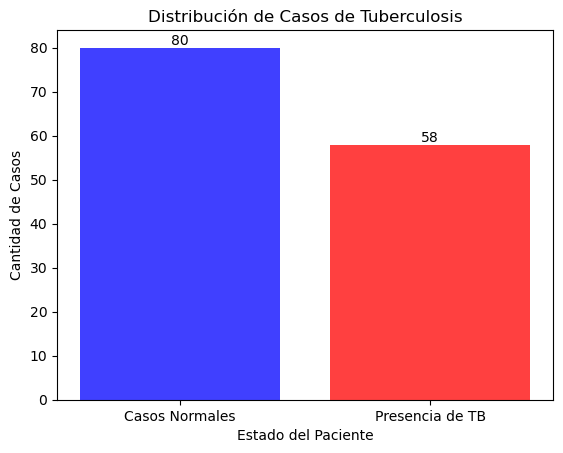

In [9]:
# Contar la cantidad de casos normales y con TB usando condiciones
count_0s = len(montgomery_metadata[montgomery_metadata['findings'] == "normal"])
count_1s = len(montgomery_metadata[montgomery_metadata['findings'] == "TB"])

# Preparar los datos para el gráfico
labels = ['Casos Normales', 'Presencia de TB']
counts = [count_0s, count_1s]

# Crear el histograma
bars = plt.bar(labels, counts, color=['blue', 'red'], alpha=0.75)

# Agregar título y etiquetas
plt.title('Distribución de Casos de Tuberculosis')
plt.xlabel('Estado del Paciente')
plt.ylabel('Cantidad de Casos')

# Añadir anotaciones con la cantidad exacta sobre cada barra
for bar, count in zip(bars, counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{count}', va='bottom', ha='center')

# Mostrar el gráfico
plt.show()

Se verifica las dimensiones de cada imagen del dataset.

In [10]:
# Ruta del directorio con las imágenes
#image_folder = '/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png'
image_folder='/Daniel/2024/2024-1/Reconocimiento de Patrones/clase9_challenge'
# Función para obtener las dimensiones de las imágenes
def get_image_dimensions(image_folder):
    dimensions = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.png'):  # Asegurarse de procesar solo archivos PNG
            image_path = os.path.join(image_folder, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                dimensions.append((filename, width, height))
    return dimensions

# Obtener dimensiones
image_dimensions = get_image_dimensions(image_folder)

# Mostrar las dimensiones de cada imagen
for item in image_dimensions:
    print(f"Archivo: {item[0]}, Ancho: {item[1]}, Alto: {item[2]}")


Archivo: MCUCXR_0001_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0002_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0003_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0004_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0005_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0006_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0008_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0011_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0013_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0015_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0016_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0017_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0019_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0020_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0021_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0022_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0023_0.png, Ancho: 4892, Alto: 4020
Archivo: MCUCXR_0024_0.png, Ancho: 4020, Alto: 4892
Archivo: MCUCXR_0026_0.png, Ancho: 4020, Alto: 4892
Archivo: MCU

##Preprocesamiento de datos

Se interrelaciona las imágenes con las etiquetas almacenadas en el dataframe

In [11]:
#se crea nueva columna en 'montgomery_metadata` tiene las columnas 'study_id' para el nombre del archivo y 'findings' para las etiquetas
montgomery_metadata['filename'] = montgomery_metadata['study_id'].apply(lambda x: f"{x}.png")
montgomery_metadata.head(5)

,study_id,age,gender,findings,filename
0,MCUCXR_0019_0,033Y,M,normal,MCUCXR_0019_0.png
1,MCUCXR_0393_1,030Y,F,TB,MCUCXR_0393_1.png
2,MCUCXR_0091_0,023Y,M,normal,MCUCXR_0091_0.png
3,MCUCXR_0074_0,056Y,F,normal,MCUCXR_0074_0.png
4,MCUCXR_0070_0,045Y,F,normal,MCUCXR_0070_0.png


Se configura el generador de imágenes para el preprocesamiento y la división en conjuntos de entrenamiento y validación.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reservar el 20% de los datos para la validación
)

Se crean generadores de datos

In [13]:
train_generator = datagen.flow_from_dataframe(
    dataframe=montgomery_metadata,
    #directory='/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png',  # Ajusta según la ruta correcta
    directory='/Daniel/2024/2024-1/Reconocimiento de Patrones/clase9_challenge',
    x_col='filename',  # columna que contiene los nombres de archivo
    y_col='findings',  # columna que contiene las etiquetas
    target_size=(256, 256),  # Redimensionamiento de las imágenes
    batch_size=10,
    class_mode='binary',
    subset='training'  # Subconjunto para entrenamiento
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=montgomery_metadata,
    #directory='/content/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png',  # Ajusta según la ruta correcta
    directory='/Daniel/2024/2024-1/Reconocimiento de Patrones/clase9_challenge',
    x_col='filename',
    y_col='findings',
    target_size=(256, 256),
    batch_size=10,
    class_mode='binary',
    subset='validation'  # Subconjunto para validación
)


Found 111 validated image filenames belonging to 2 classes.
Found 27 validated image filenames belonging to 2 classes.


In [14]:
# Verificar el número de muestras y ajustar 'steps_per_epoch'
print(f"Entrenamiento: {train_generator.samples}")
print(f"Validación: {validation_generator.samples}")

# Asegúrate de que 'steps_per_epoch' y 'validation_steps' no sean 0
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, validation_generator.samples // validation_generator.batch_size)

Entrenamiento: 111
Validación: 27


In [15]:
steps_per_epoch

11

In [16]:
validation_steps

2

##Entrenamiento de modelo CNN

**Modelo inicial**

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Definir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

In [18]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Entrenar el modelo
modelb0 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)

Epoch 1/20
11/11 [==============================] - 35s 3s/step - loss: 0.7560 - accuracy: 0.4257 - val_loss: 0.6675 - val_accuracy: 0.6000
Epoch 2/20
11/11 [==============================] - 27s 2s/step - loss: 0.7586 - accuracy: 0.5644 - val_loss: 0.6706 - val_accuracy: 0.6000
Epoch 3/20
11/11 [==============================] - 26s 2s/step - loss: 0.7096 - accuracy: 0.4950 - val_loss: 0.6463 - val_accuracy: 0.7500
Epoch 4/20
11/11 [==============================] - 26s 3s/step - loss: 0.7050 - accuracy: 0.4950 - val_loss: 0.6649 - val_accuracy: 0.6000
Epoch 5/20
11/11 [==============================] - 26s 2s/step - loss: 0.6902 - accuracy: 0.5941 - val_loss: 0.6715 - val_accuracy: 0.7000
Epoch 6/20
11/11 [==============================] - 26s 2s/step - loss: 0.6898 - accuracy: 0.5644 - val_loss: 0.6548 - val_accuracy: 0.8000
Epoch 7/20
11/11 [==============================] - 26s 2s/step - loss: 0.6896 - accuracy: 0.5743 - val_loss: 0.6794 - val_accuracy: 0.7000
Epoch 8/20
11/11 [==

##Evaluación de resultados

3/3 [==============================] - 6s 2s/step - loss: 0.6449 - accuracy: 0.6667
Loss: 0.644898533821106
Accuracy: 0.6666666865348816


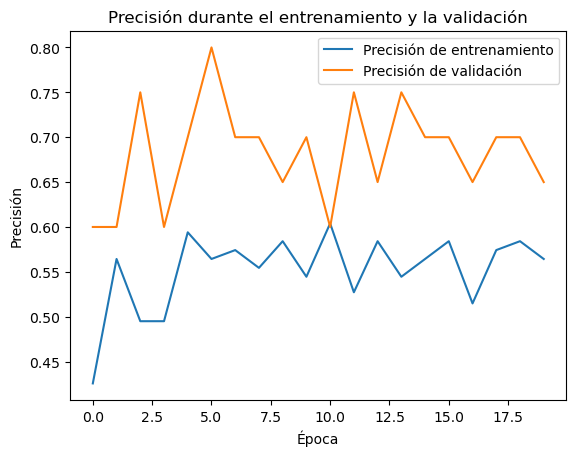

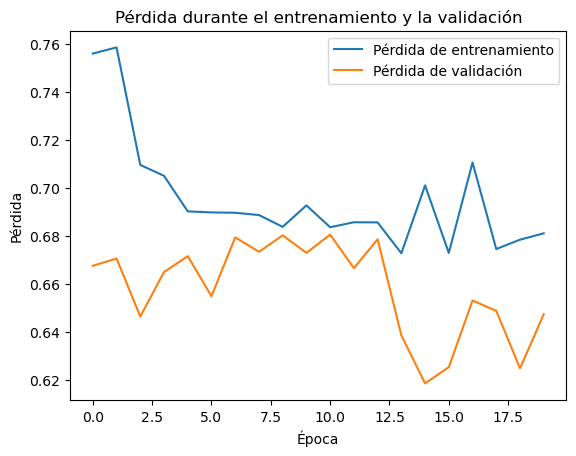

In [20]:
# Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Graficar la precisión
import matplotlib.pyplot as plt

plt.plot(modelb0.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(modelb0.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(modelb0.history['loss'], label='Pérdida de entrenamiento')
plt.plot(modelb0.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

##Tuneo de hiperparametros

Usando keras-tuner

In [19]:
import tensorflow as tf
from tensorflow.keras import regularizers
import keras_tuner as kt
from keras_tuner import RandomSearch

def build_model(hp):
    model = tf.keras.Sequential([
        # Capa convolucional inicial
        tf.keras.layers.Conv2D(
            hp.Int('conv_1_filter', min_value=16, max_value=64, step=16),
            (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(
            hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
            (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(
            hp.Int('conv_1_filter', min_value=64, max_value=256, step=64),
            (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),
        
        # Capa densa
        tf.keras.layers.Dense(
            hp.Int('dense_units', min_value=64, max_value=128, step=32),
            activation='relu'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Capa de salida para clasificación binaria
    #output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid', name="output_layer")(model.output)

    # Modelo final ensamblado
    #model = tf.keras.Model(inputs=model.input, outputs=output_layer)

    # Selección de la tasa de aprendizaje
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"])

    return model


In [22]:
import shutil
import os

# Directorio donde se almacenan los resultados del tuner
directory_path = "C:/Daniel/2024/2024-1/Reconocimiento de Patrones/clas9_challe_result"

# Verificar si el directorio existe
if os.path.exists(directory_path):
    # Eliminar el directorio y todos los archivos contenidos
    shutil.rmtree(directory_path)
    print("Directorio eliminado: ", directory_path)
else:
    print("El directorio no existe")


El directorio no existe


In [21]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='C:\Daniel\2024\2024-1\Reconocimiento de Patrones\clas9_challe_result',
    project_name='intro_to_kt2',
    overwrite=True
)

In [23]:
tuner.search(train_generator,validation_data=validation_generator,epochs=20)

Trial 18 Complete [00h 03m 41s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 0.7037037014961243
Total elapsed time: 00h 26m 07s

Search: Running Trial #19

Value             |Best Value So Far |Hyperparameter
48                |16                |conv_1_filter
64                |96                |dense_units
0.001             |0.001             |learning_rate
4                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/4


KeyboardInterrupt: 

In [24]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [25]:
hypermodel = tuner.hypermodel.build(best_hps)

In [28]:
# Definir el callback para el entrenamiento
callback_early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

# Definir el callback para guardar el mejor modelo
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/mejor_modelo_p1.h5',  # Nombre del archivo para guardar el modelo
    monitor='val_accuracy',     # Métrica a monitorear para determinar el mejor modelo
    save_best_only=True,        # Guardar solo el mejor modelo
    mode='max',                 # Maximizar la métrica monitoreada
    verbose=1                   # Mostrar mensajes durante el entrenamiento
)

# Lista de callbacks para pasar al modelo durante el entrenamiento
callbacks = [callback_early, callback_checkpoint]


In [29]:
# Entrenar el modelo con los callbacks
history_hypermodel = hypermodel.fit(
    train_generator,
    epochs=5,
    callbacks=callbacks,
    validation_data=validation_generator
)

Epoch 1/5
7/7 [==============================] - ETA: 0s - loss: 0.8340 - accuracy: 0.5495
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to /content/drive/MyDrive/Colab Notebooks\mejor_modelo_p1.h5
7/7 [==============================] - 33s 5s/step - loss: 0.8340 - accuracy: 0.5495 - val_loss: 0.6540 - val_accuracy: 0.6667
Epoch 2/5
7/7 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.5405
Epoch 2: val_accuracy did not improve from 0.66667
7/7 [==============================] - 29s 4s/step - loss: 0.6973 - accuracy: 0.5405 - val_loss: 0.6639 - val_accuracy: 0.6667
Epoch 3/5
7/7 [==============================] - ETA: 0s - loss: 0.6974 - accuracy: 0.5225
Epoch 3: val_accuracy did not improve from 0.66667
7/7 [==============================] - 29s 4s/step - loss: 0.6974 - accuracy: 0.5225 - val_loss: 0.6781 - val_accuracy: 0.6667
Epoch 4/5
7/7 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5405
Epoch 4: val_accuracy did 

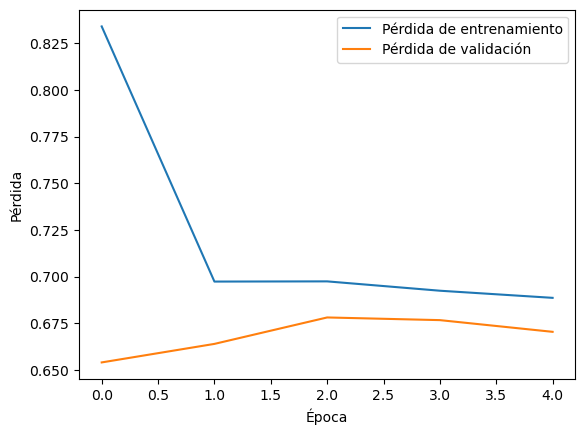

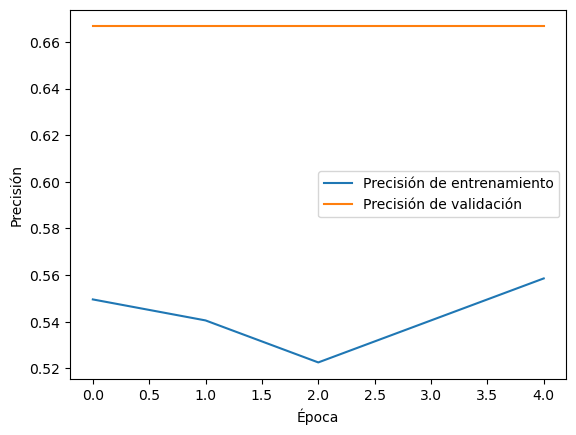

In [30]:
# Gráfico de pérdida
plt.plot(history_hypermodel.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_hypermodel.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfico de precisión
plt.plot(history_hypermodel.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_hypermodel.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

##Discusión

A pesar de realizar el tuneo de hiperparámetros, no se obtuvieron mejoras significativas. Esto puede deberse al número insuficiente de iteraciones en el proceso de búsqueda, por lo que no se hizo una exploración adecuada del espacio de hiperparámetros.